In [16]:
import numpy as np
def init_params(nx, nh, ny):
    """Initialise les poids et biais."""
    W1 = np.random.normal(0, 0.3, (nh, nx))
    b1 = np.zeros((nh, 1))
    W2 = np.random.normal(0, 0.3, (ny, nh))
    b2 = np.zeros((ny, 1))
    
    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

In [17]:
def forward(params, X):
    """Effectue une passe avant à travers le réseau."""
    W1, b1, W2, b2 = params['W1'], params['b1'], params['W2'], params['b2']

    Z1 = np.dot(X, W1.T) + b1.T  # Correction : b1.T → b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, W2.T) + b2.T
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=1, keepdims=True)  # Softmax

    return A2, Z1, A1


In [18]:
def loss_accuracy(Yhat, Y):
    """Calculates the cross-entropy loss and accuracy."""
    loss = -np.mean(np.sum(Y * np.log(Yhat + 1e-8), axis=1))  # Correction de transposition
    accuracy = 100 * np.mean(np.argmax(Yhat, axis=1) == np.argmax(Y, axis=1))
    return loss, accuracy

# Backpropagation Algorithm

The backpropagation algorithm is used to update the weights in a neural network. The weight update rule is given by:

W_ji <- W_ji + ΔW_ji

where the weight change ΔW_ji is calculated as:

ΔW_ji = -η * (dE_d / dW_ji)

Here, η is the learning rate, and E_d is the error for a given data point d.

## Chain Rule Application

The weight W_ji influences the network through net_j, which is the weighted sum of inputs to neuron j:

net_j = sum_i (W_ji * X_ji)

Using the chain rule, we can express the partial derivative of the error with respect to the weight as:

dE_d / dW_ji = (dE_d / dnet_j) * (dnet_j / dW_ji)

Since dnet_j / dW_ji = X_ji, the equation simplifies to:

dE_d / dW_ji = (dE_d / dnet_j) * X_ji

Thus, the weight update rule becomes:

ΔW_ji = -η * (dE_d / dnet_j) * X_ji

## Remaining Task

The remaining task is to derive a convenient expression for dE_d / dnet_j, which depends on the activation function and the error propagation through the network.

---

# Derivation of Back Propagation Algorithm

## Case 1: Output Unit (Softmax Activation)

When unit j is an output unit of the network, the error can be directly computed based on the difference between the predicted output and the actual target.

### Training Rule for Output Unit Weights

The weight update rule for output unit weights is given by:

ΔW_ji = -η * (dE_d / dW_ji)

Using the chain rule, we can express this as:

ΔW_ji = -η * (dE_d / dnet_j) * X_ji

Where:

dE_d / dnet_j = (o_j - t_j)

Thus, the weight update rule becomes:

ΔW_ji = η * (o_j - t_j) * X_ji

We can also define δ_j as:

δ_j = (o_j - t_j)

So the weight update rule can be simplified to:

ΔW_ji = η * δ_j * X_ji

---

## Case 2: Hidden Unit (Tanh Activation)

When unit j is an internal (hidden) unit of the network, the error is propagated backward from the output layers through the network.

### Training Rule for Hidden Unit Weights

For hidden units, the error is propagated backward from the downstream layers. The derivative of the error with respect to the net input of a hidden unit net_j is given by:

dE_d / dnet_j = sum over downstream units k (dE_d / dnet_k * dnet_k / dnet_j)

Where:
- dnet_k / dnet_j = W_kj * do_j / dnet_j
- do_j / dnet_j is the derivative of the activation function (tanh).

For the **tanh** activation function:

do_j / dnet_j = 1 - o_j^2

Thus, the error term for the hidden unit j becomes:

δ_j = (sum over downstream units k (δ_k * W_kj)) * (1 - o_j^2)

The weight update rule for hidden unit weights is then:

ΔW_ji = η * δ_j * X_ji

In [19]:
def backward(params, outputs, Y, X):
    """Calcule les gradients de la perte par rapport aux paramètres."""
    Yhat, Z1, A1 = outputs
    m = Y.shape[0]

    δ2 = Yhat - Y  # Pas de transposition
    dW2 = np.dot(δ2.T, A1) / m  # Correction de dimension
    db2 = np.sum(δ2, axis=0, keepdims=True) / m
    db2 = db2.T

    δ1 = np.dot(δ2, params['W2']) * (1 - np.power(A1, 2))  # Derivée de tanh
    dW1 = np.dot(δ1.T, X) / m
    db1 = np.sum(δ1, axis=0, keepdims=True) / m
    db1 = db1.T

    grads = {'W1': dW1, 'b1': db1, 'W2': dW2, 'b2': db2}
    return grads


In [20]:
def sgd(params, grads, eta):
    """Met à jour les paramètres via la descente de gradient."""
    for key in params.keys():
        params[key] -= eta * grads[key]

Epoch 1/10 - Loss: 0.8317 - Accuracy: 74.80%
Epoch 2/10 - Loss: 0.4260 - Accuracy: 86.91%
Epoch 3/10 - Loss: 0.3547 - Accuracy: 89.27%
Epoch 4/10 - Loss: 0.3149 - Accuracy: 90.51%
Epoch 5/10 - Loss: 0.2876 - Accuracy: 91.35%
Epoch 6/10 - Loss: 0.2669 - Accuracy: 92.03%
Epoch 7/10 - Loss: 0.2502 - Accuracy: 92.59%
Epoch 8/10 - Loss: 0.2364 - Accuracy: 93.05%
Epoch 9/10 - Loss: 0.2246 - Accuracy: 93.40%
Epoch 10/10 - Loss: 0.2143 - Accuracy: 93.66%
✅ Modèle sauvegardé avec succès !


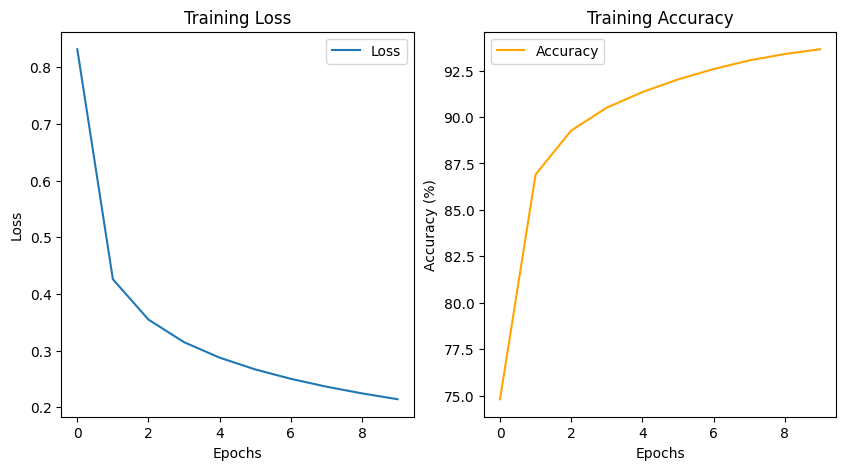

Test Loss: 0.2249, Test Accuracy: 93.04%


In [21]:
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Preprocess data
X_train = X_train.reshape(-1, 28 * 28) / 255.0
X_test = X_test.reshape(-1, 28 * 28) / 255.0
Y_train = np.eye(10)[Y_train]  # One-hot encode labels
Y_test = np.eye(10)[Y_test]

# Hyperparameters
nx = X_train.shape[1]
nh = 132
ny = 10
epochs = 10
mini_batch_size = 128
eta = 0.05

# Initialize parameters
params = init_params(nx, nh, ny)

# Training loop
loss_history = []
accuracy_history = []

for epoch in range(epochs):
    epoch_loss = []
    epoch_accuracy = []

    for i in range(0, X_train.shape[0], mini_batch_size):
        X_batch = X_train[i:i + mini_batch_size]
        Y_batch = Y_train[i:i + mini_batch_size]

        # Forward pass
        Yhat, Z1, A1 = forward(params, X_batch)

        # Backward pass
        grads = backward(params, (Yhat, Z1, A1), Y_batch, X_batch)

        # Update parameters
        sgd(params, grads, eta)

        # Calculate and store loss and accuracy
        loss, accuracy = loss_accuracy(Yhat, Y_batch)
        epoch_loss.append(loss)
        epoch_accuracy.append(accuracy)

    # Calcul de la moyenne de la loss et de l'accuracy pour l'epoch
    avg_loss = np.mean(epoch_loss)
    avg_accuracy = np.mean(epoch_accuracy)
    loss_history.append(avg_loss)
    accuracy_history.append(avg_accuracy)
    
    # Affichage des métriques pour l'epoch en cours
    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Accuracy: {avg_accuracy:.2f}%")

    # Condition d'arrêt si précision > 99%
    if avg_accuracy > 99:
        break

# Sauvegarde des paramètres du modèle
with open("model_mnist.pkl", "wb") as file:
    pickle.dump(params, file)

print("✅ Modèle sauvegardé avec succès !")


# Plot loss and accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_history, label="Loss")
plt.title("Training Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label="Accuracy", color='orange')
plt.title("Training Accuracy")
plt.ylabel("Accuracy (%)")
plt.xlabel("Epochs")
plt.legend()

plt.show()

# Evaluate on test set
Yhat_test, _, _ = forward(params, X_test)
test_loss, test_accuracy = loss_accuracy(Yhat_test, Y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


✅ Modèle chargé avec succès !


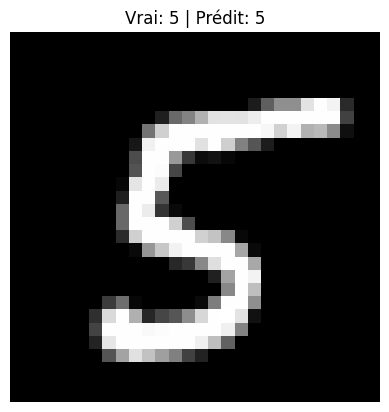

In [22]:
# Chargement du modèle sauvegardé
with open("model_mnist.pkl", "rb") as file:
    loaded_params = pickle.load(file)

print("✅ Modèle chargé avec succès !")

# Sélection d'une image aléatoire
index = np.random.randint(0, X_test.shape[0])
X_sample = X_test[index].reshape(1, -1)  # Reshape pour correspondre au format du modèle
Y_sample_true = np.argmax(Y_test[index])  # Classe réelle

# Prédiction avec le modèle chargé
Yhat_sample, _, _ = forward(loaded_params, X_sample)
Y_sample_pred = np.argmax(Yhat_sample)  # Classe prédite

# Affichage de l'image et du résultat
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Vrai: {Y_sample_true} | Prédit: {Y_sample_pred}")
plt.axis("off")
plt.show()


